# Example of Reading and Processing AoT Data from File

The Array of Things project makes available experimental data on the waggle [website](https://wa8.gl).

For this example data was selected from a random AoT node deployed in Chicago. The data is read in from comma separated values (CSV) file that was retrieved from the [Waggle experimental data site](http://www.mcs.anl.gov/research/projects/waggle/downloads/beehive1/).  The data selected was for AoT **nodeID** *001e0610bbe5* with **Name** 02C at **location** *Martin Luther King Dr. - 87th St.* for the **date** *02/25/2018*.

In [1]:
# using pandas to store and manipulate the AoT data
import pandas as pd

# read_csv reads in data from file (2018-02-25.csv), where values are seperated by ";", since
# dataset does not have headers, the "names" parameter is set to the list of headers
# for each of the columns
data = pd.read_csv('2018-02-25.csv', sep=";", names = ["nodeId", "timestamp", "sensor", "frame", "sensorBrand","sensorType","sensorValue"])

# the first 5 rows of data is displayed below
data.head()

,nodeId,timestamp,sensor,frame,sensorBrand,sensorType,sensorValue
0,001e0610bbe5,2018/02/25 00:00:14,coresense:4,frame,ML8511,intensity,9733
1,001e0610bbe5,2018/02/25 00:00:14,coresense:4,frame,HTU21D,temperature,6.46
2,001e0610bbe5,2018/02/25 00:00:14,coresense:4,frame,HTU21D,humidity,82.16
3,001e0610bbe5,2018/02/25 00:00:14,coresense:4,frame,MMA8452Q,acceleration.y,-0.9834
4,001e0610bbe5,2018/02/25 00:00:14,coresense:4,frame,MMA8452Q,acceleration.x,-0.0146


In [3]:
# make a copy of data to create new dataframe for temperature readings
temperatureHT = data[(data['sensorBrand'] == 'HTU21D') & (data['sensorType'] == 'temperature')].copy()
temperatureTM = data[(data['sensorBrand'] == 'TMP112') & (data['sensorType'] == 'temperature')].copy()
temperaturePR = data[(data['sensorBrand'] == 'PR103J2') & (data['sensorType'] == 'temperature')].copy()
temperatureTS = data[(data['sensorBrand'] == 'TSYS01') & (data['sensorType'] == 'temperature')].copy()
temperatureBM = data[(data['sensorBrand'] == 'BMP180') & (data['sensorType'] == 'temperature')].copy()
temperatureTM4 = data[(data['sensorBrand'] == 'TMP421') & (data['sensorType'] == 'temperature')].copy()
temperatureHI = data[(data['sensorBrand'] == 'HIH6130') & (data['sensorType'] == 'temperature')].copy()

In [4]:
# convert temperature readings to fahrenheit from celsius
temperatureHT['sensorValue'] = temperatureHT['sensorValue'].astype(float) * 1.8 + 32;
temperatureTM['sensorValue'] = temperatureTM['sensorValue'].astype(float) * 1.8 + 32;
temperaturePR['sensorValue'] = temperaturePR['sensorValue'].astype(float) * 1.8 + 32;
temperatureTS['sensorValue'] = temperatureTS['sensorValue'].astype(float) * 1.8 + 32;
temperatureBM['sensorValue'] = temperatureBM['sensorValue'].astype(float) * 1.8 + 32;
temperatureTM4['sensorValue'] = temperatureTM4['sensorValue'].astype(float) * 1.8 + 32;
temperatureHI['sensorValue'] = temperatureHI['sensorValue'].astype(float) * 1.8 + 32;

In [5]:
# convert timestamp values do datatime
temperatureHT.timestamp = pd.to_datetime(temperatureHT.timestamp)
temperatureTM.timestamp = pd.to_datetime(temperatureTM.timestamp)
temperaturePR.timestamp = pd.to_datetime(temperaturePR.timestamp)
temperatureTS.timestamp = pd.to_datetime(temperatureTS.timestamp)
temperatureBM.timestamp = pd.to_datetime(temperatureBM.timestamp)
temperatureTM4.timestamp = pd.to_datetime(temperatureTM4.timestamp)
temperatureHI.timestamp = pd.to_datetime(temperatureHI.timestamp)

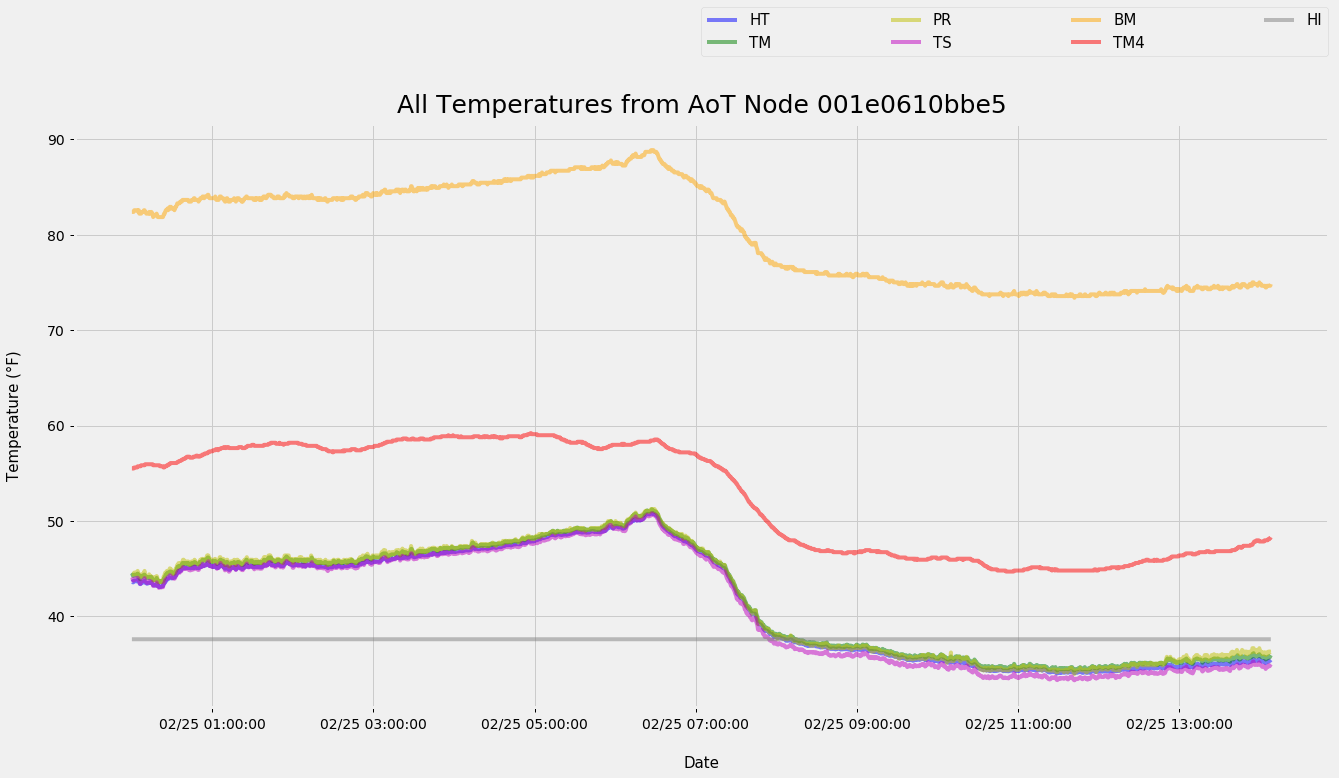

In [6]:
#import libraries
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline

plt.style.use('fivethirtyeight')

#plot data
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('All Temperatures from AoT Node 001e0610bbe5',fontsize = 25, fontdict = {'verticalalignment':'bottom'})
ax.set_xlabel('Date',fontsize = 15,labelpad=25)
ax.set_ylabel('Temperature (°F)',fontsize = 15,labelpad=25)

#set ticks every week
plt.tick_params(axis='both',which='both', width='1',length=5,pad = 5)
#ax.xaxis.set_major_locator(mdates.SecondLocator())
#set major ticks format
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d %H:%M:%S'))

# Plot
plt.plot(temperatureHT.timestamp, temperatureHT.sensorValue, label='HT',color = 'b',alpha= 0.5)
plt.plot(temperatureTM.timestamp, temperatureTM.sensorValue, label='TM',color = 'g',alpha=0.5)
plt.plot(temperaturePR.timestamp, temperaturePR.sensorValue, label='PR', color = 'y',alpha=0.5)
plt.plot(temperatureTS.timestamp, temperatureTS.sensorValue, label='TS', color = 'm',alpha=0.5)
plt.plot(temperatureBM.timestamp, temperatureBM.sensorValue,label='BM', color = 'orange',alpha=0.5)
plt.plot(temperatureTM4.timestamp, temperatureTM4.sensorValue, label='TM4', color = 'r',alpha=0.5)
plt.plot(temperatureHI.timestamp, temperatureHI.sensorValue, label='HI', color = 'grey',alpha=0.5)

# Legend
plt.legend(bbox_to_anchor=(0.5, 1.,0.5, 0.2), 
           ncol=4, fontsize='15', mode="expand", borderaxespad=0.)